In [44]:
import altair as alt
import quilt3 as q3
import numpy as np
import pandas as pd

# Random quality scores
In [0, 5].

In [45]:
total = 1000
lows = np.random.normal(2, .5, size=(total//5))
highs = np.random.normal(4, .5, size=(4*total//5))
distro = np.append(lows, highs)
distro = np.clip(distro, 0, 5)

In [46]:
quality = pd.DataFrame(distro, columns=['score'])
quality.describe()

,score
count,1000.000000
mean,3.592626
std,0.910327
min,0.892691
25%,3.218937
50%,3.839374
75%,4.210414
max,5.000000


In [47]:
base = alt.Chart(quality)

hist = base.mark_bar(color="#7fc97f", opacity=.8).encode(
    alt.X(
        "score:Q",
        bin=alt.BinParams(maxbins=40),
    ),
    y='count()',
    tooltip=['count(score):Q', 'min(score):Q', 'max(score):Q']
)

aggregates = base.transform_aggregate(
    mean='mean(score)',
    median='median(score)',
).transform_fold(
    ['mean', 'median']
).mark_rule().encode(
    x='value:Q',
    size=alt.value(4),
    color=alt.Color("key:N", scale=alt.Scale(range=['#beaed4', '#fdfc086']))
)


from altair import datum
dens = alt.Chart(quality).transform_density(
    'score',
    as_=['score', 'density']
).transform_calculate(
    density='datum.density * 233',
).mark_area(color='gray', opacity=.2).encode(
    x="score:Q",
    y='density:Q',
    tooltip=['count(score):Q', 'min(score):Q', 'max(score):Q', 'density:Q']
)

dens | hist + aggregates + dens

alt.HConcatChart(...)

# Random labels
Suppose we have a 3-class problem. We wish to classify military vehicles by their princple mode of transportation. The classes are unevenly distributed.

In [48]:
choices = 3*["land"] + 2*["air"] + ["sea"]


In [49]:
labels = [np.random.choice(choices) for i in range(1000)]
vehicles = pd.DataFrame()
vehicles['labels'] = labels

In [50]:
vehicles

,labels
0,air
1,air
2,land
3,land
4,land
...,...
995,air
996,sea
997,air
998,land


In [51]:
counts = vehicles.groupby('labels').size()
counts = counts.reset_index().rename(columns={0: 'counts'})
counts

,labels,counts
0,air,359
1,land,477
2,sea,164


In [52]:
hist = alt.Chart(counts).mark_bar(
    color="#7fc97f",
    opacity=.8
).encode(
    y='counts:Q',
    x='labels:N',
    color='labels:N',
    tooltip=['counts:Q']
).configure_range(
    category={'scheme': 'dark2'}
)

hist

alt.Chart(...)

In [53]:
!ls

QuiltAltairHistogram.ipynb	      justmadeit.json
export-2021-10-08T22_27_38.805Z.json


In [54]:
import json

with open("export-2021-10-08T22_27_38.805Z.json", "r") as f:
    lbsample = json.load(f)

In [88]:
ex = lbsample[0]
answers = ex['Label']['classifications']
answers[0].keys()

dict_keys(['featureId', 'schemaId', 'title', 'value', 'answer'])

In [101]:
answers[0]

{'featureId': 'ckuifwlk00001386cddv6zgfe',
 'schemaId': 'cku7n4oef0gir0yarb6zp8v1b',
 'title': 'The SPEECH SIGNAL in this sample was:',
 'value': 'the_speech_signal_in_this_sample_was',
 'answer': {'featureId': 'ckuifwlk00000386co734xgh4',
  'schemaId': 'cku7n4ogo0gj10yar30ff4i5y',
  'title': 'Not distorted (5)',
  'value': 'not_distorted_5'}}

In [91]:
len(answers[0]['featureId'])

25

In [89]:
import pprint

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(answers)

[ { 'answer': { 'featureId': 'ckuifwlk00000386co734xgh4',
                'schemaId': 'cku7n4ogo0gj10yar30ff4i5y',
                'title': 'Not distorted (5)',
                'value': 'not_distorted_5'},
    'featureId': 'ckuifwlk00001386cddv6zgfe',
    'schemaId': 'cku7n4oef0gir0yarb6zp8v1b',
    'title': 'The SPEECH SIGNAL in this sample was:',
    'value': 'the_speech_signal_in_this_sample_was'},
  { 'answer': { 'featureId': 'ckuifwpxl0002386ckcyzui56',
                'schemaId': 'cku7n4ogs0gjn0yareblugw1v',
                'title': 'Slightly noticeable (4)',
                'value': 'slightly_noticeable_4'},
    'featureId': 'ckuifwpxl0003386c746qph4x',
    'schemaId': 'cku7n4oeg0git0yaremx8eh5u',
    'title': 'The BACKGROUND in this sample was:',
    'value': 'the_background_in_this_sample_was'},
  { 'answer': { 'featureId': 'ckuifwu730004386c2kpp34pv',
                'schemaId': 'cku7n4ogr0gjd0yar251oa5jn',
                'title': 'Good (4)',
                'value': 'good_4

In [60]:
label_df.columns

Index(['Label.classifications.featureId', 'Label.classifications.schemaId',
       'Label.classifications.title', 'Label.classifications.value',
       'Label.classifications.answer.featureId',
       'Label.classifications.answer.schemaId',
       'Label.classifications.answer.title',
       'Label.classifications.answer.value', 'Dataset Name', 'DataRow ID',
       'ID', 'Created By', 'Project Name', 'Seconds to Label', 'Skipped'],
      dtype='object')

In [73]:
label_df = pd.json_normalize(
    lbsample,
    record_path=["Label", "classifications"],
    record_prefix="Label.classifications.",
    meta=[["Dataset Name"], ["DataRow ID"], ["ID"], ["Created By"], ["Project Name"], ["Seconds to Label"], ["Skipped"]]
)
strcols = [
    'Label.classifications.featureId',
    'Label.classifications.schemaId',
    'Label.classifications.title', 'Label.classifications.value',
    'Label.classifications.answer.featureId',
    'Label.classifications.answer.schemaId',
    'Label.classifications.answer.title',
    'Label.classifications.answer.value',
    'Dataset Name',
    'DataRow ID',
    'ID',
    'Created By'
]

numcols = ['Seconds to Label']

boolcols = ['Skipped']

for c in strcols:
    label_df[c] = label_df[c].astype("string")
for c in numcols:
    label_df[c] =label_df[c].astype("float")
for c in boolcols:
    label_df[c] = label_df[c].astype("bool")


In [74]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Label.classifications.featureId         540 non-null    string 
 1   Label.classifications.schemaId          540 non-null    string 
 2   Label.classifications.title             540 non-null    string 
 3   Label.classifications.value             540 non-null    string 
 4   Label.classifications.answer.featureId  540 non-null    string 
 5   Label.classifications.answer.schemaId   540 non-null    string 
 6   Label.classifications.answer.title      540 non-null    string 
 7   Label.classifications.answer.value      540 non-null    string 
 8   Dataset Name                            540 non-null    string 
 9   DataRow ID                              540 non-null    string 
 10  ID                                      540 non-null    string

In [77]:
label_df.apply(pd.Series.nunique)

Label.classifications.featureId           540
Label.classifications.schemaId              3
Label.classifications.title                 3
Label.classifications.value                 3
Label.classifications.answer.featureId    540
Label.classifications.answer.schemaId      15
Label.classifications.answer.title         15
Label.classifications.answer.value         15
Dataset Name                                2
DataRow ID                                 60
ID                                        180
Created By                                  3
Project Name                                1
Seconds to Label                          180
Skipped                                     1
dtype: int64

In [38]:
uxid = set(r["Created By"] for r in lbsample)
len(uxid)

3

In [39]:
label_df.query("`Created By` == 'labeler3@yellow.lbworkforce.com'")

,Label.classifications.featureId,Label.classifications.schemaId,Label.classifications.title,Label.classifications.value,Label.classifications.answer.featureId,Label.classifications.answer.schemaId,Label.classifications.answer.title,Label.classifications.answer.value,Dataset Name,DataRow ID,ID,Created By,Project Name,Seconds to Label,Skipped
0,ckuifwlk00001386cddv6zgfe,cku7n4oef0gir0yarb6zp8v1b,The SPEECH SIGNAL in this sample was:,the_speech_signal_in_this_sample_was,ckuifwlk00000386co734xgh4,cku7n4ogo0gj10yar30ff4i5y,Not distorted (5),not_distorted_5,VidsInAttachments2,ckuhfwhqg0f1p0z8g67vy15ud,ckuiezf5i5fmw0y97d4tl18w5,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,34.539,False
1,ckuifwpxl0003386c746qph4x,cku7n4oeg0git0yaremx8eh5u,The BACKGROUND in this sample was:,the_background_in_this_sample_was,ckuifwpxl0002386ckcyzui56,cku7n4ogs0gjn0yareblugw1v,Slightly noticeable (4),slightly_noticeable_4,VidsInAttachments2,ckuhfwhqg0f1p0z8g67vy15ud,ckuiezf5i5fmw0y97d4tl18w5,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,34.539,False
2,ckuifwu730005386cvgs8jueo,cku7n4oeg0giv0yarac18dkjb,The OVERALL SPEECH SAMPLE was:,the_overall_speech_sample_was,ckuifwu730004386c2kpp34pv,cku7n4ogr0gjd0yar251oa5jn,Good (4),good_4,VidsInAttachments2,ckuhfwhqg0f1p0z8g67vy15ud,ckuiezf5i5fmw0y97d4tl18w5,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,34.539,False
3,ckuif03qh0001386ci94xantw,cku7n4oef0gir0yarb6zp8v1b,The SPEECH SIGNAL in this sample was:,the_speech_signal_in_this_sample_was,ckuif075l0002386c3ykjmd8d,cku7n4ogq0gj90yar1y0i9hq5,Very distorted (1),very_distorted_1,VidsInAttachments2,ckuhfwi4u0f1g0y8x4qyg12o8,ckuiezfyd5fn40y97a68m9h08,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,16.368,False
4,ckuif0a7z0004386cn6re822g,cku7n4oeg0git0yaremx8eh5u,The BACKGROUND in this sample was:,the_background_in_this_sample_was,ckuif0d4n0005386c7m1lts6s,cku7n4ogs0gjt0yar0hbwg2pp,Very intrusive (1),very_intrusive_1,VidsInAttachments2,ckuhfwi4u0f1g0y8x4qyg12o8,ckuiezfyd5fn40y97a68m9h08,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,16.368,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,ckuifux3d004b386cd4ltdvq6,cku7n4oeg0git0yaremx8eh5u,The BACKGROUND in this sample was:,the_background_in_this_sample_was,ckuifux3c004a386cige9tx9t,cku7n4ogs0gjt0yar0hbwg2pp,Very intrusive (1),very_intrusive_1,VidsInAttachments2GOLD,ckuhg2thk0frn0z8g1f9v0c7l,ckuifuen65a260zc8h91n5ctv,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,13.945,False
509,ckuifuz21004d386cm86slk4s,cku7n4oeg0giv0yarac18dkjb,The OVERALL SPEECH SAMPLE was:,the_overall_speech_sample_was,ckuifuz21004c386c3b49vrm2,cku7n4ogs0gjj0yarexvs71km,Bad (1),bad_1,VidsInAttachments2GOLD,ckuhg2thk0frn0z8g1f9v0c7l,ckuifuen65a260zc8h91n5ctv,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,13.945,False
513,ckuifv6kp004f386cv3vz9ho2,cku7n4oef0gir0yarb6zp8v1b,The SPEECH SIGNAL in this sample was:,the_speech_signal_in_this_sample_was,ckuifgmjn00013o6cu8wjpofb,cku7n4ogq0gj70yareska1s9t,Fairly distorted (2),fairly_distorted_2,VidsInAttachments2GOLD,ckuhg2tuf0gkv0yaz2xy6epb1,ckuifuq7j5l4v0y9745nd3xqe,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,51.632,False
514,ckuifv8re004h386cbyoi36ki,cku7n4oeg0git0yaremx8eh5u,The BACKGROUND in this sample was:,the_background_in_this_sample_was,ckuifgfb100003o6c1i11wqgi,cku7n4ogs0gjt0yar0hbwg2pp,Very intrusive (1),very_intrusive_1,VidsInAttachments2GOLD,ckuhg2tuf0gkv0yaz2xy6epb1,ckuifuq7j5l4v0y9745nd3xqe,labeler3@yellow.lbworkforce.com,Trial - Noise reduction quality measurement v2,51.632,False


In [40]:
labelers = label_df["Created By"].unique()
labelers

array(['labeler3@yellow.lbworkforce.com',
       'labeler6@yellow.lbworkforce.com',
       'labeler10@yellow.lbworkforce.com'], dtype=object)

array([[<AxesSubplot:title={'center':'Seconds to Label'}>]], dtype=object)

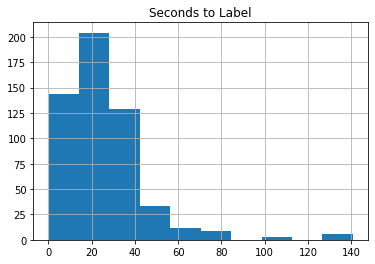

In [41]:

label_df.hist(column="Seconds to Label")

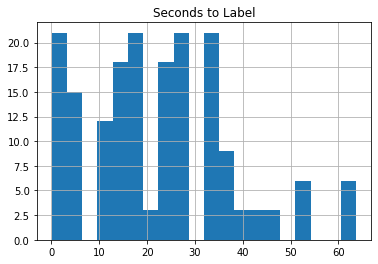

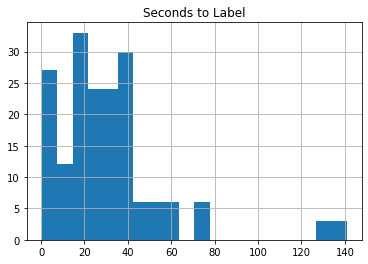

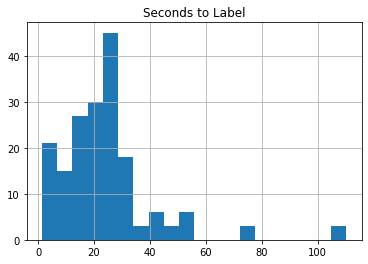

In [129]:
for l in labelers:
    mydf = label_df.query(f"`Created By` == '{l}'")
    mydf.hist(bins=20)

In [108]:
!ls 

QuiltAltairHistogram.ipynb  export-2021-10-08T22_27_38.805Z.json  nouns.txt
README.md		    justmadeit.json			  words.txt


In [110]:
import json

with open("nouns.txt", "r") as f:
    nouns = f.readlines()
    nouns = [n.strip() for n in lines]

In [148]:
vocab = string.ascii_uppercase + string.ascii_lowercase + string.digits

def random_id(prefix='cku', length=25):
    return prefix + ''.join(random.choice(vocab) for _ in range(length - len(prefix)))

def random_ngram(n=2):
    return ' '.join([random.choice(nouns) for _ in range(n)])

def random_int_score(min=1, max=5):
    return random.randint(min, max)

In [147]:
random_ngram(n=2)

'hall police'

In [112]:
random.choice?

Signature: random.choice(seq)
Docstring: Choose a random element from a non-empty sequence.
File:      ~/opt/miniconda3/envs/de/lib/python3.8/random.py
Type:      method


In [158]:
[random_int_score() for _ in range(200)]

[2,
 1,
 2,
 5,
 1,
 4,
 5,
 1,
 5,
 3,
 5,
 5,
 5,
 5,
 1,
 3,
 2,
 5,
 2,
 2,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 4,
 5,
 3,
 3,
 4,
 3,
 2,
 4,
 1,
 1,
 4,
 2,
 2,
 5,
 2,
 2,
 4,
 5,
 5,
 2,
 1,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 1,
 2,
 2,
 5,
 4,
 5,
 4,
 5,
 5,
 3,
 1,
 1,
 5,
 3,
 4,
 3,
 1,
 2,
 1,
 3,
 4,
 4,
 2,
 3,
 2,
 2,
 5,
 1,
 1,
 4,
 2,
 3,
 2,
 2,
 4,
 5,
 4,
 5,
 2,
 5,
 4,
 1,
 5,
 5,
 2,
 3,
 1,
 2,
 2,
 4,
 1,
 2,
 3,
 2,
 5,
 1,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 3,
 4,
 5,
 2,
 5,
 3,
 2,
 4,
 3,
 2,
 5,
 4,
 5,
 1,
 2,
 4,
 4,
 2,
 3,
 4,
 3,
 1,
 5,
 5,
 2,
 2,
 4,
 4,
 2,
 4,
 1,
 1,
 4,
 4,
 1,
 5,
 2,
 4,
 1,
 4,
 2,
 1,
 4,
 1,
 4,
 4,
 1,
 5,
 3,
 5,
 4,
 4,
 5,
 2,
 3,
 3,
 5,
 4,
 4,
 2,
 1,
 2,
 4,
 2,
 1,
 1,
 2,
 5,
 1,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 2,
 2,
 1,
 2]